In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter

In [35]:
image1 = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imwrite('img1_gray.jpg', image1)
cv2.imwrite('img2_gray.jpg', image2)

True

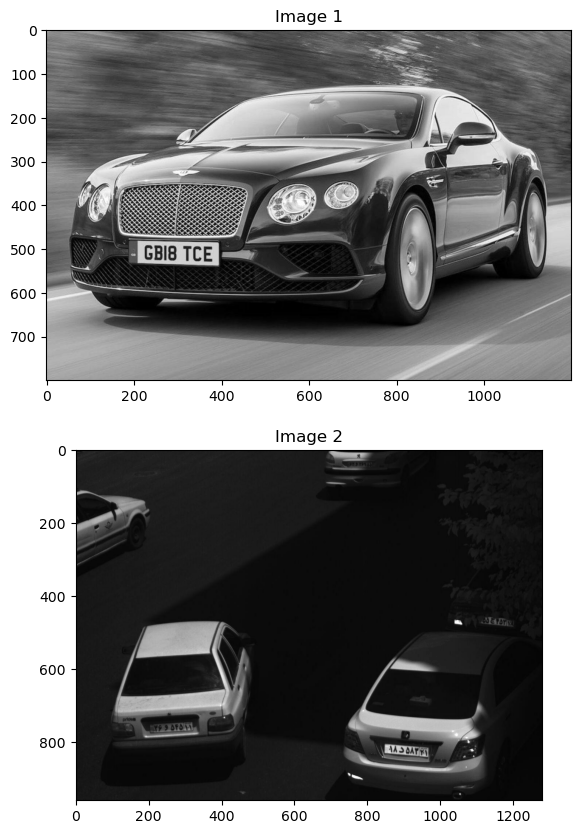

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].imshow(image1, cmap='gray')
axs[0].set_title('Image 1')
axs[1].imshow(image2, cmap='gray')
axs[1].set_title('Image 2')
plt.show()


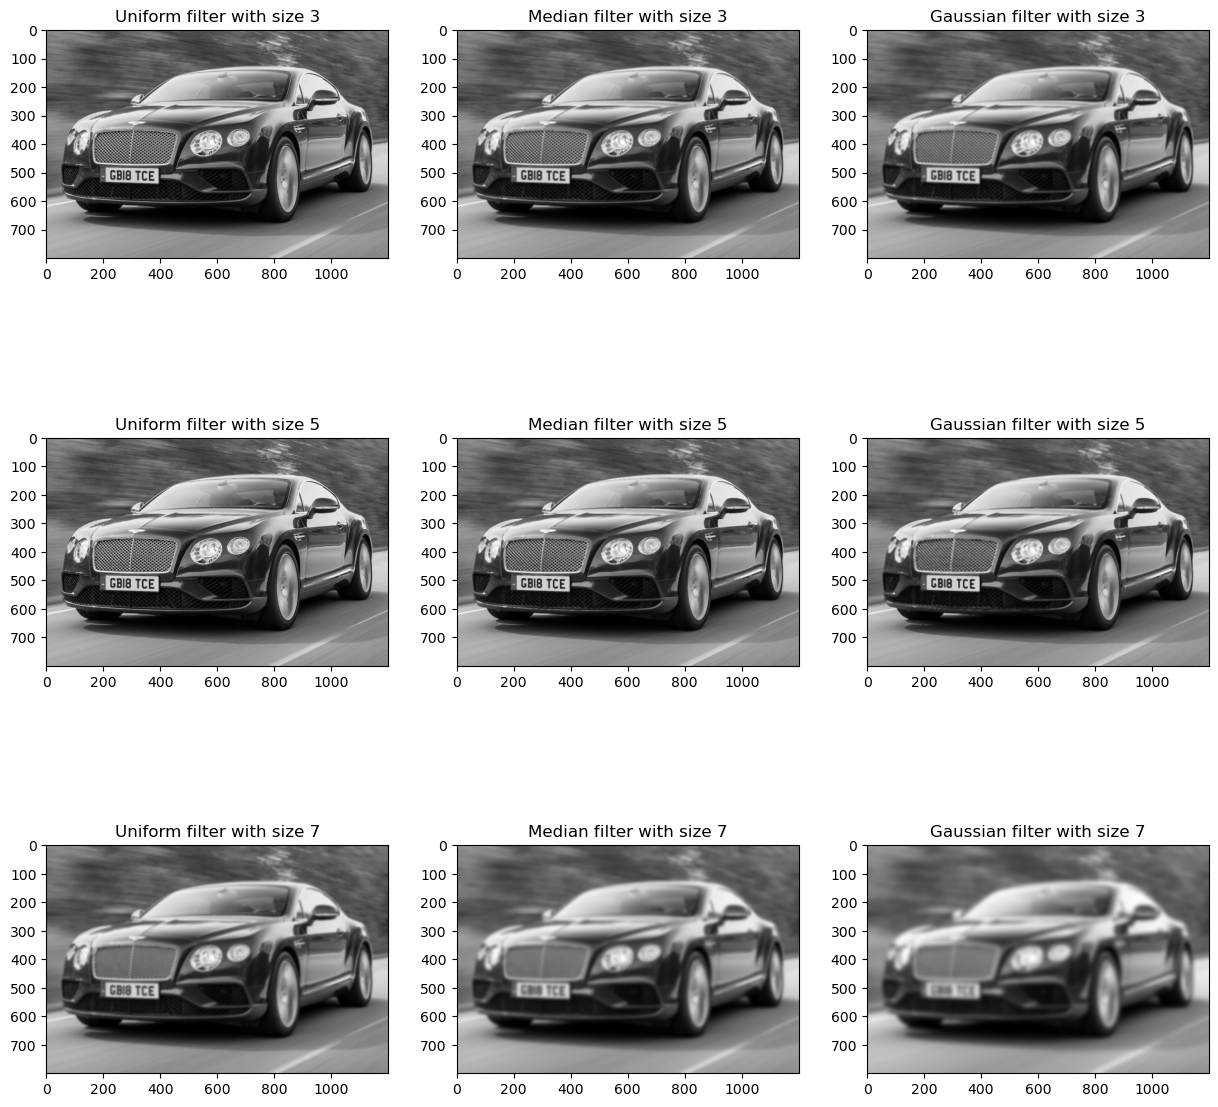

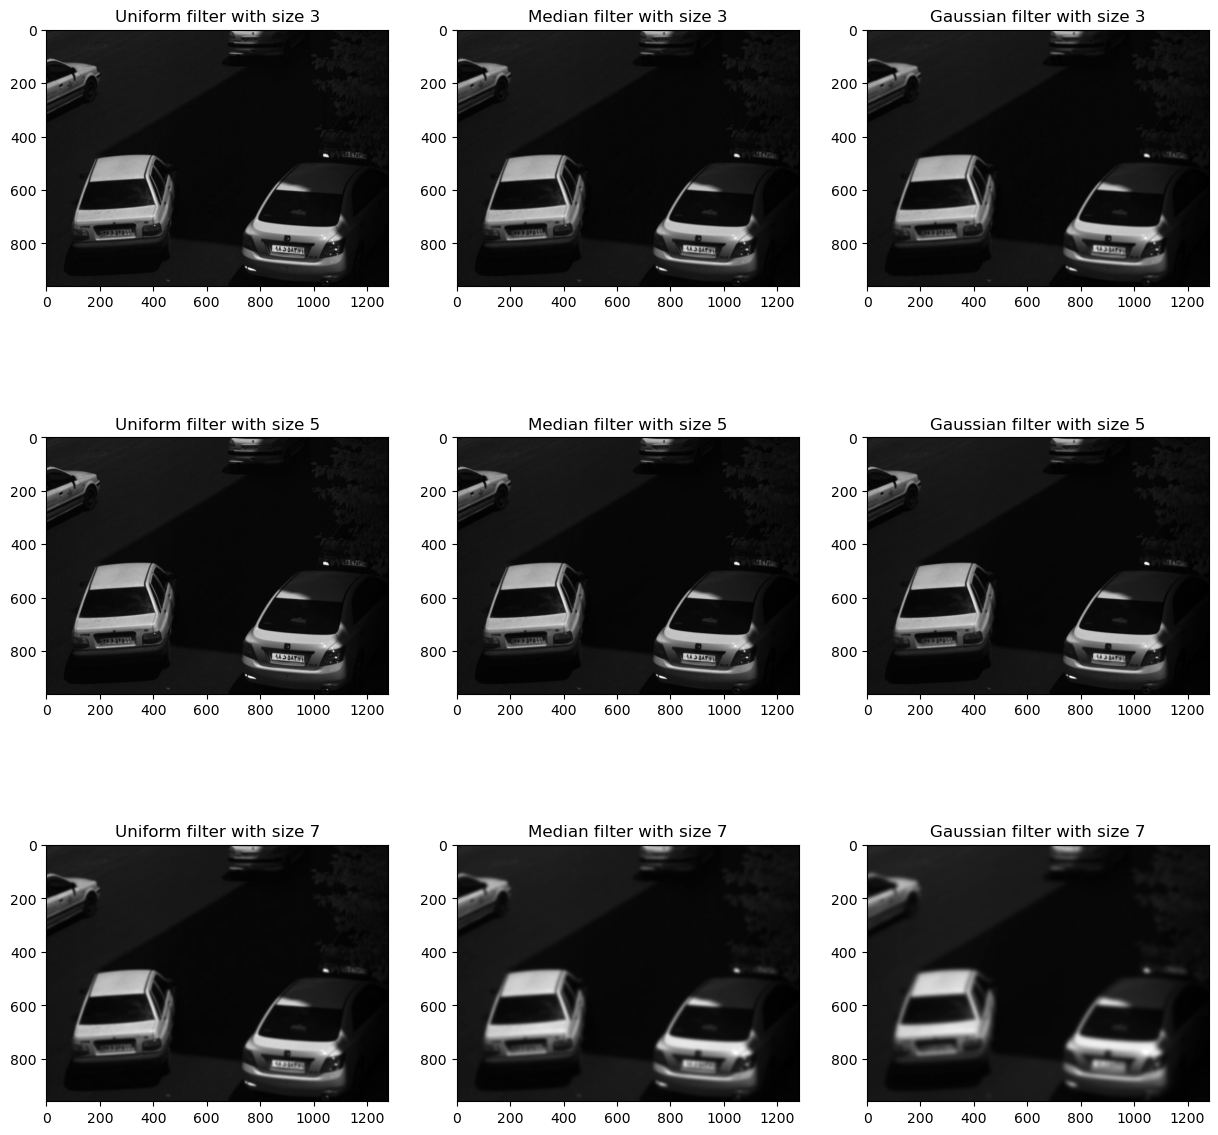

In [37]:
def apply_filters(image, filters_sizes = [3, 5, 7]):
    images = []
    for size in filters_sizes:
        images.append(uniform_filter(image, size))
        images.append(median_filter(image, size))
        images.append(gaussian_filter(image, size))
    return images

images1 = apply_filters(image1)
images2 = apply_filters(image2)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    axs[i, 0].imshow(images1[i], cmap='gray')
    axs[i, 0].set_title('Uniform filter with size ' + str(2*i + 3))
    axs[i, 1].imshow(images1[i + 3], cmap='gray')
    axs[i, 1].set_title('Median filter with size ' + str(2*i + 3))
    axs[i, 2].imshow(images1[i + 6], cmap='gray')
    axs[i, 2].set_title('Gaussian filter with size ' + str(2*i + 3))
plt.show()

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    axs[i, 0].imshow(images2[i], cmap='gray')
    axs[i, 0].set_title('Uniform filter with size ' + str(2*i + 3))
    axs[i, 1].imshow(images2[i + 3], cmap='gray')
    axs[i, 1].set_title('Median filter with size ' + str(2*i + 3))
    axs[i, 2].imshow(images2[i + 6], cmap='gray')
    axs[i, 2].set_title('Gaussian filter with size ' + str(2*i + 3))
plt.show()


Here we applied 3 kinds of filters: Gaussian filter, Median filter and Mean filter with kernel size 3, 5 and 7. If we look af images with 7 kernel size which makes the biggest comperssion; we can see that the image is blurred and the edges are not clear. As of our example, the uniform filter result has the best quality. It's because of eye detection is a kind of edge detection. So, the uniform filter is the best choice for this kind of image processing.

Text(0.5, 1.0, 'Prewitt filter for image 2')

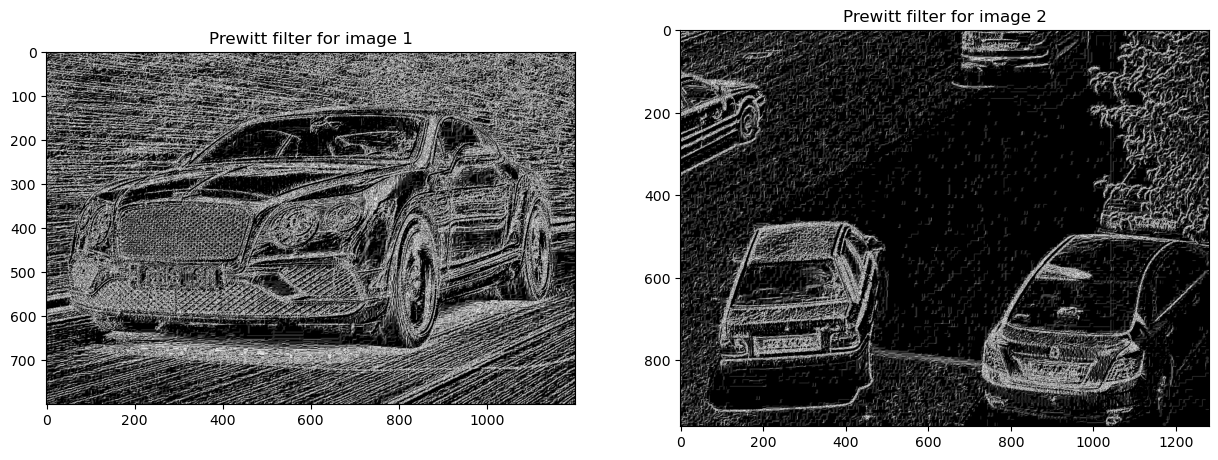

In [38]:
def apply_prewitt(img):
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewitt_x_image = cv2.filter2D(img, -1, prewitt_x)
    prewitt_y_image = cv2.filter2D(img, -1, prewitt_y)
    return np.sqrt(prewitt_x_image**2 + prewitt_y_image**2)

prewitt_images1 = [apply_prewitt(image1)]
prewitt_images2 = [apply_prewitt(image2)]

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(prewitt_images1[0], cmap='gray')
axs[0].set_title('Prewitt filter for image 1')
axs[1].imshow(prewitt_images2[0], cmap='gray')
axs[1].set_title('Prewitt filter for image 2')

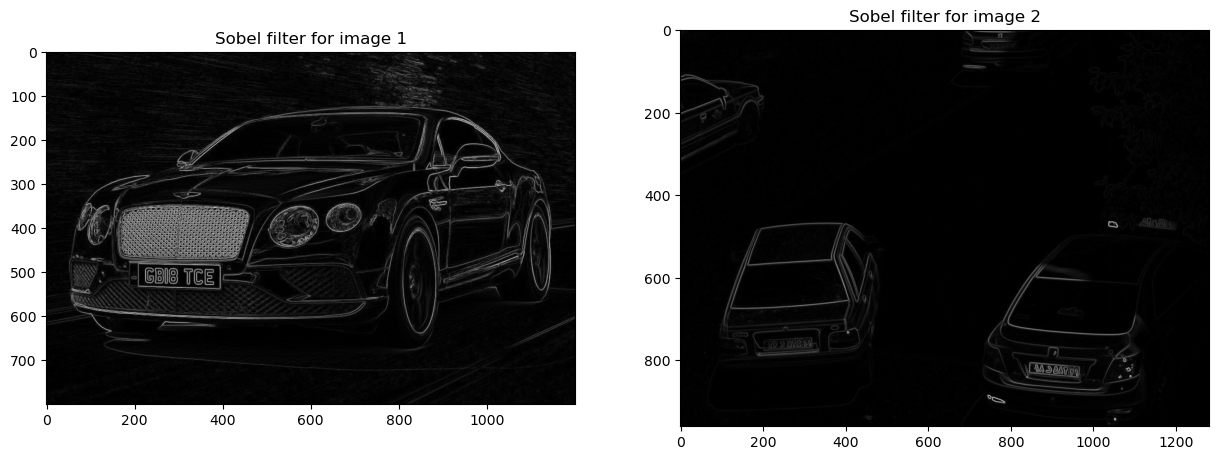

In [39]:
def apply_sobel(img):
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    return sobel_magnitude

sobel_image1 = apply_sobel(image1)
sobel_image2 = apply_sobel(image2)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(sobel_image1, cmap='gray')
axs[0].set_title('Sobel filter for image 1')
axs[1].imshow(sobel_image2, cmap='gray')
axs[1].set_title('Sobel filter for image 2')
plt.show()

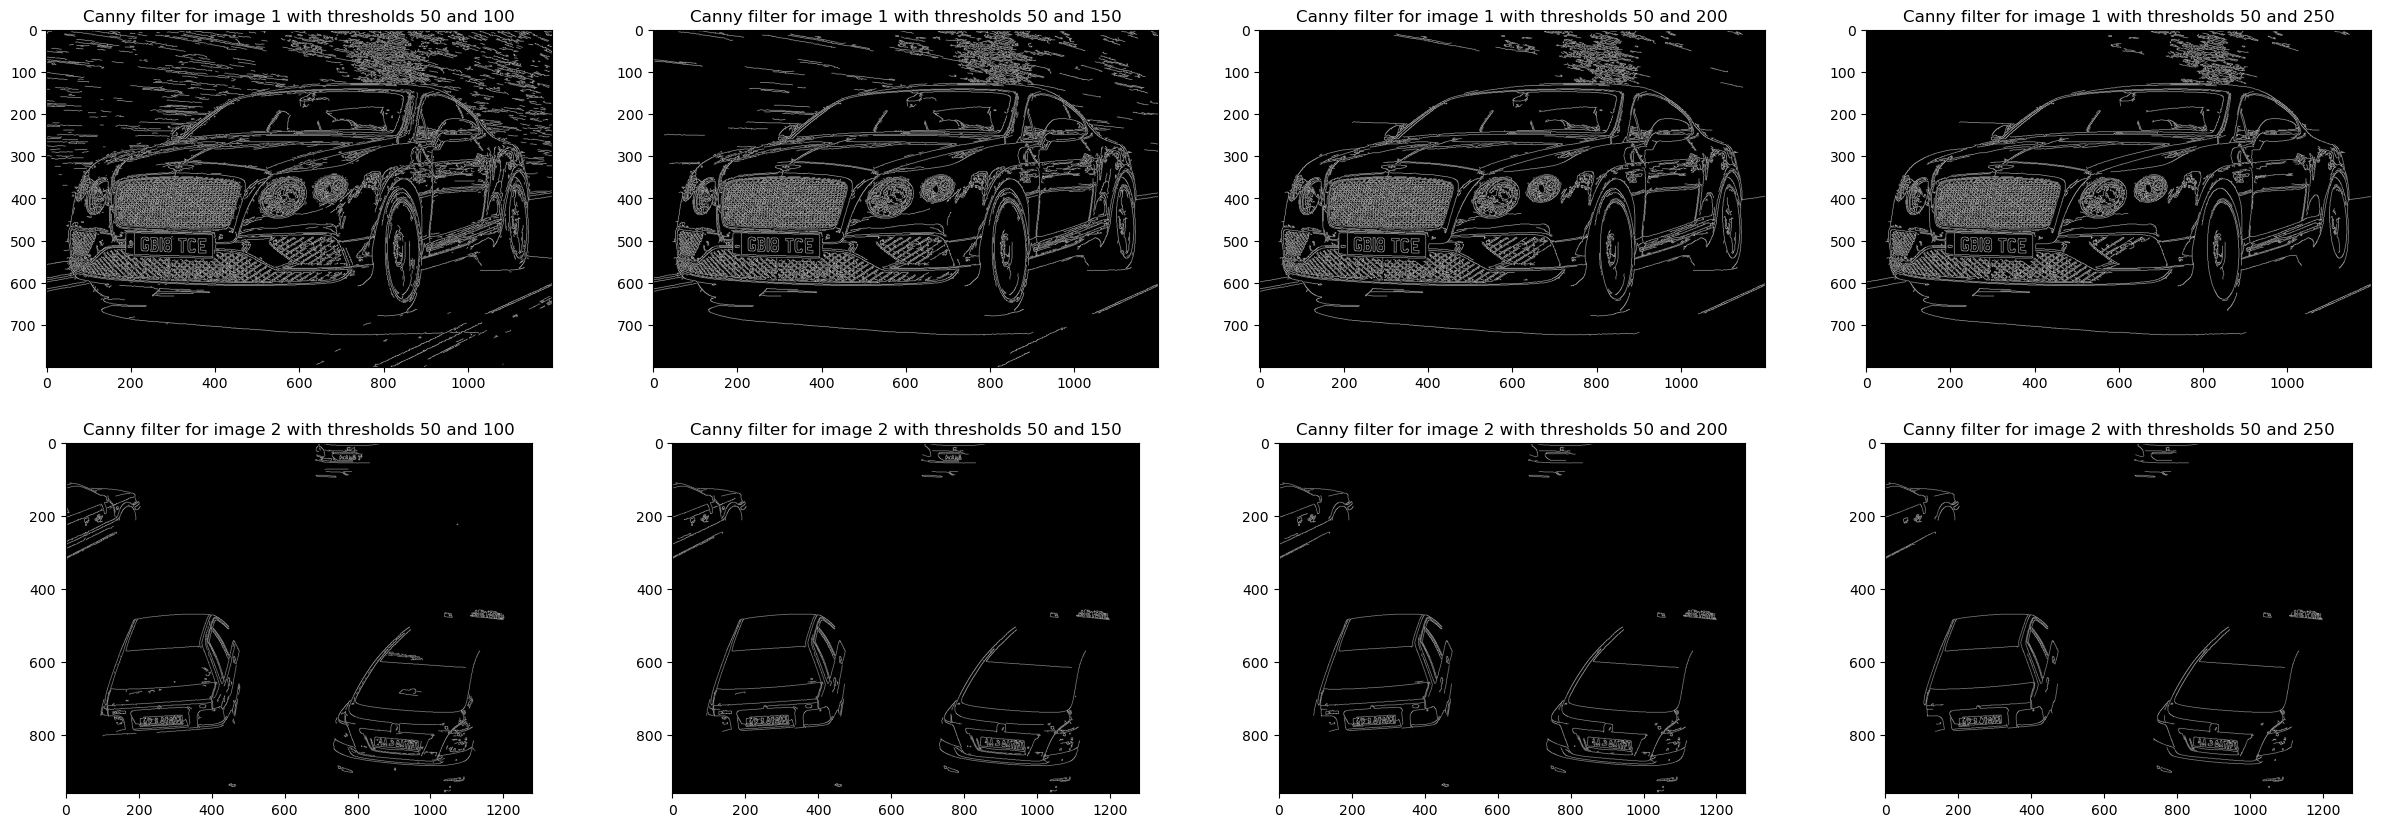

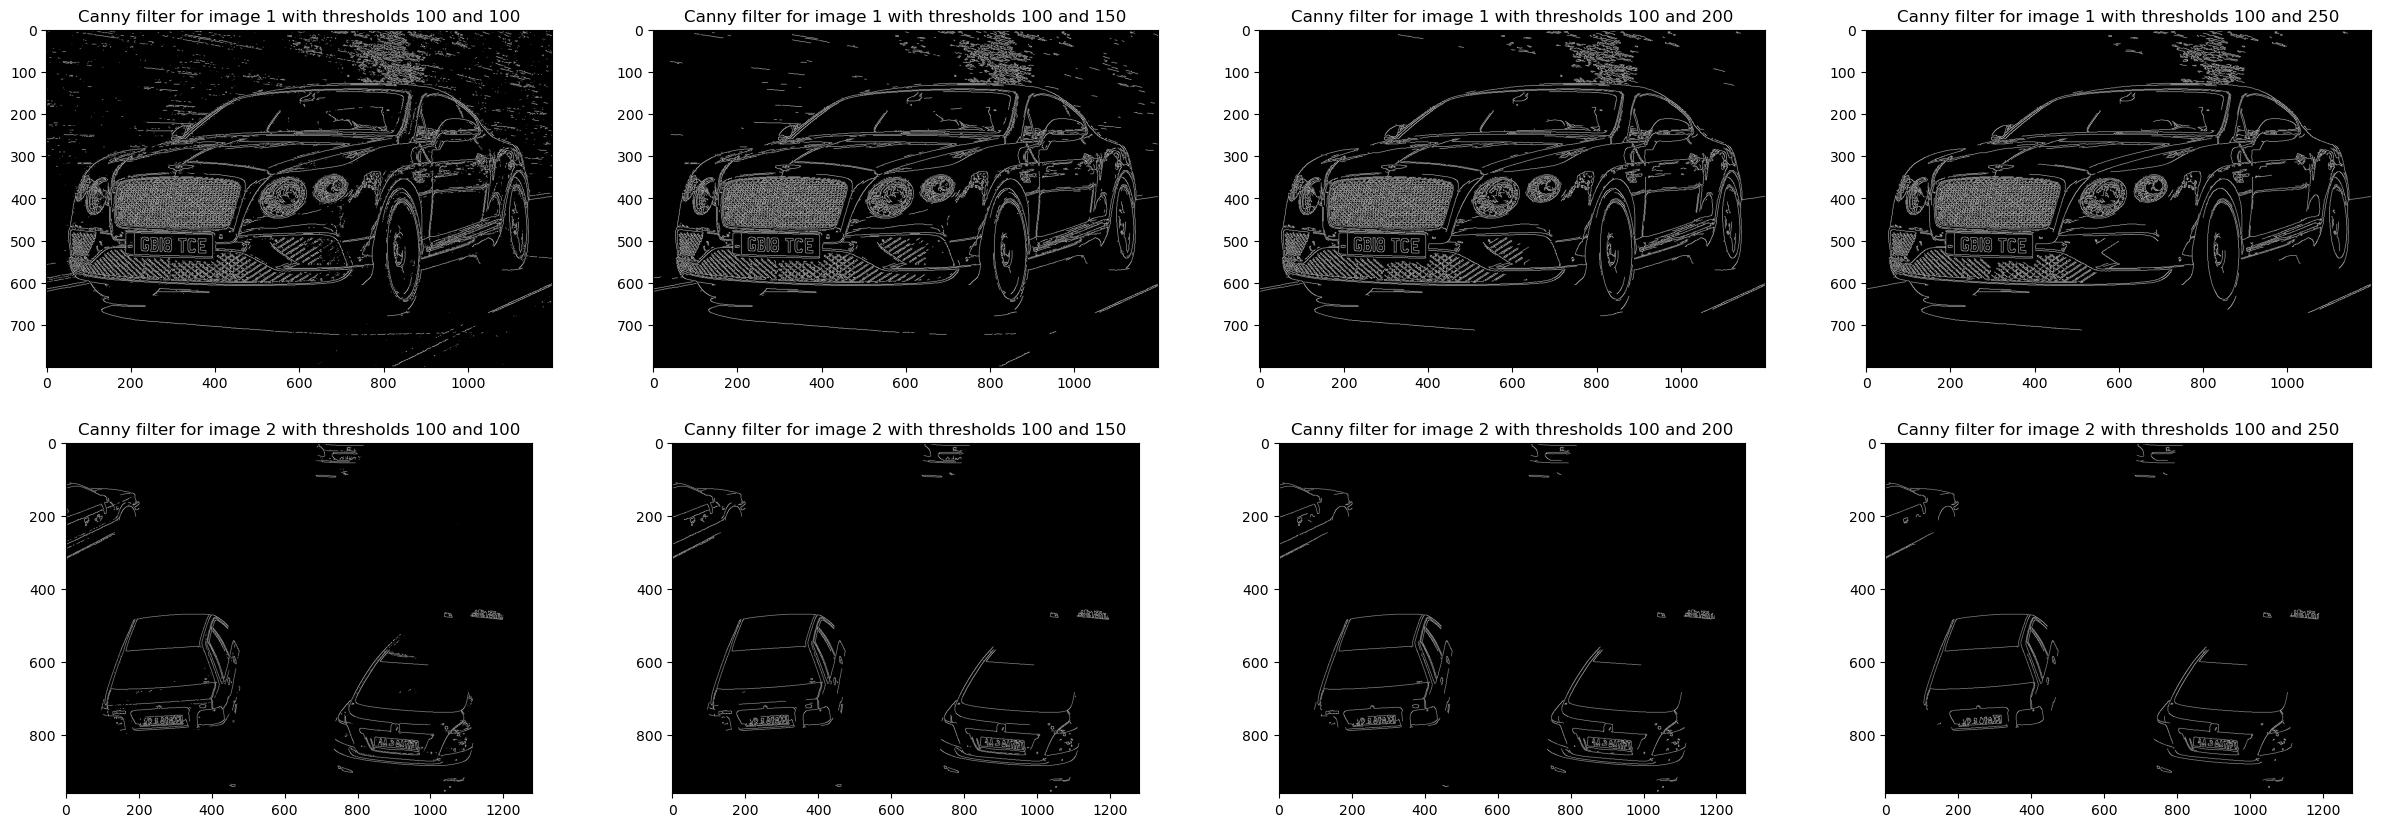

In [40]:
def apply_canny(image, params):
    return cv2.Canny(image, *params)

fig, axs = plt.subplots(2, 4, figsize=(30, 10))
for i in range(4):
    axs[0, i].imshow(apply_canny(image1, (50, 100 + 50*i)), cmap='gray')
    axs[0, i].set_title('Canny filter for image 1 with thresholds ' + str(50) + ' and ' + str(100 + 50*i))
    axs[1, i].imshow(apply_canny(image2, (50, 100 + 50*i)), cmap='gray')
    axs[1, i].set_title('Canny filter for image 2 with thresholds ' + str(50) + ' and ' + str(100 + 50*i))

plt.show()

fig, axs = plt.subplots(2, 4, figsize=(30, 10))
for i in range(4):
    axs[0, i].imshow(apply_canny(image1, (100, 100 + 50*i)), cmap='gray')
    axs[0, i].set_title('Canny filter for image 1 with thresholds ' + str(100) + ' and ' + str(100 + 50*i))
    axs[1, i].imshow(apply_canny(image2, (100, 100 + 50*i)), cmap='gray')
    axs[1, i].set_title('Canny filter for image 2 with thresholds ' + str(100) + ' and ' + str(100 + 50*i))

plt.show()

Canny filter is a popular edge detection algorithm. It gets two thresholds, `low` and `high`, and returns a binary image where the pixels are edges if they are above the `high` threshold and connected to an edge. Results of vanny filter are usually better than those of Sobel filter. Alsom, Canny filter with high threshold 100 and low threshold 50 is the best choice for this kind of image processing. However in case of image 1, the canny filter keeps a lot of edge detection, which is very detailed and maybe for more detailed images like image 1, it is better to use sobel filter.

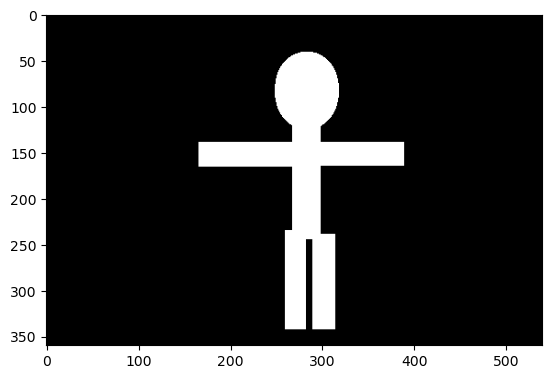

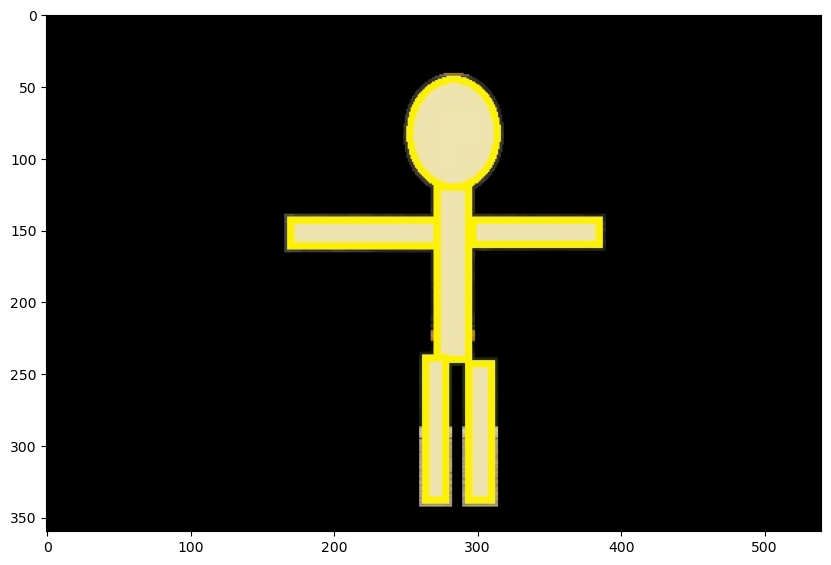

True

In [41]:
def remove_background(background, object_img):
    background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
    object_gray = cv2.cvtColor(object_img, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((5, 5), np.uint8)
    diff = cv2.absdiff(background_gray, object_gray)
    _, thresholded = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)
    # plt.imshow(thresholded, cmap='gray')
    mask = cv2.dilate(thresholded, kernel)
    mask = cv2.erode(mask, kernel)
    mask = cv2.dilate(mask, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    plt.imshow(mask, cmap='gray')
    foreground = cv2.bitwise_and(object_img, object_img, mask=mask)
    return foreground

image1 = cv2.imread('image.jpg')
image2 = cv2.imread('image2.jpg')
result = remove_background(image1, image2)
fig = plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('result.png', result)

End of one of the videos reached or cannot read the frames.
Grayscale video saved as output_grayscale.mp4


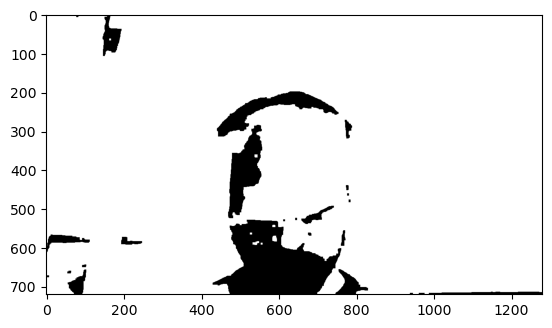

In [42]:
def remove_background_from_video(background_video, object_video, output_video):
    cap1 = cv2.VideoCapture(background_video)
    cap2 = cv2.VideoCapture(object_video)
    
    if not cap1.isOpened():
        print(f"Error: Cannot open background video {background_video}")
        return
    if not cap2.isOpened():
        print(f"Error: Cannot open object video {object_video}")
        return
    
    frame_width = int(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap1.get(cv2.CAP_PROP_FPS) if cap1.get(cv2.CAP_PROP_FPS) > 0 else 20.0
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (frame_width, frame_height), isColor=False)
    
    if not out.isOpened():
        print(f"Error: Cannot open video writer for {output_video}")
        cap1.release()
        cap2.release()
        return
    
    while True:
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()

        if not ret1 or not ret2:
            print("End of one of the videos reached or cannot read the frames.")
            break
        
        frame = remove_background(frame1, frame2)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        out.write(gray_frame)
        cv2.imshow('Grayscale Result', gray_frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Processing terminated by user.")
            break
    
    cap1.release()
    cap2.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"Grayscale video saved as {output_video}")

remove_background_from_video('background.mp4', 'object.mp4', 'output_grayscale.mp4')